In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
import yfinance as yf


In [3]:
def get_pair(name):
    curr = yf.Ticker(name)
    hist = curr.history(period = 'max')
    return (hist)

In [4]:
df = get_pair('USDCAD=X') #data pull
df.columns = ['Curr Open', 'Curr High', 'Curr Low', 'Curr Close', 'Volume', 'Dividends', 'Stock Splits']
df.reset_index(inplace = True)
df

,Date,Curr Open,Curr High,Curr Low,Curr Close,Volume,Dividends,Stock Splits
0,2003-09-17,1.3667,1.3704,1.3636,1.3667,0,0,0
1,2003-09-18,1.3660,1.3685,1.3597,1.3615,0,0,0
2,2003-09-19,1.3620,1.3630,1.3457,1.3472,0,0,0
3,2003-09-22,1.3413,1.3553,1.3365,1.3542,0,0,0
4,2003-09-23,1.3549,1.3577,1.3458,1.3551,0,0,0
...,...,...,...,...,...,...,...,...
4470,2020-11-24,1.3075,1.3089,1.3012,1.3074,0,0,0
4471,2020-11-25,1.2998,1.3029,1.2989,1.2996,0,0,0
4472,2020-11-26,1.3003,1.3022,1.2990,1.3002,0,0,0
4473,2020-11-27,1.3022,1.3025,1.2972,1.3020,0,0,0


In [5]:
df2 = get_pair('CL=F') #data pull
df2.reset_index(inplace = True)
df2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-23,31.95,32.80,31.95,32.05,79385,0,0
1,2000-08-24,31.90,32.24,31.40,31.63,72978,0,0
2,2000-08-25,31.70,32.10,31.32,32.05,44601,0,0
3,2000-08-28,32.04,32.92,31.86,32.87,46770,0,0
4,2000-08-29,32.82,33.03,32.56,32.72,49131,0,0
...,...,...,...,...,...,...,...,...
5079,2020-11-20,41.70,42.32,41.51,42.15,276340,0,0
5080,2020-11-23,42.46,43.36,42.29,43.06,300717,0,0
5081,2020-11-24,42.84,45.20,42.82,44.91,418527,0,0
5082,2020-11-25,44.82,46.26,44.73,45.71,417182,0,0


In [6]:
df2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2000-08-23,31.95,32.80,31.95,32.05,79385,0,0
1,2000-08-24,31.90,32.24,31.40,31.63,72978,0,0
2,2000-08-25,31.70,32.10,31.32,32.05,44601,0,0
3,2000-08-28,32.04,32.92,31.86,32.87,46770,0,0
4,2000-08-29,32.82,33.03,32.56,32.72,49131,0,0
...,...,...,...,...,...,...,...,...
5079,2020-11-20,41.70,42.32,41.51,42.15,276340,0,0
5080,2020-11-23,42.46,43.36,42.29,43.06,300717,0,0
5081,2020-11-24,42.84,45.20,42.82,44.91,418527,0,0
5082,2020-11-25,44.82,46.26,44.73,45.71,417182,0,0


In [7]:
df2.dtypes

Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                   int64
Dividends                int64
Stock Splits             int64
dtype: object

In [8]:
df3 = pd.merge(df, df2, on = 'Date', how = 'inner')
df3[['Date', 'Curr Close', 'Close']].head()

,Date,Curr Close,Close
0,2003-09-17,1.3667,27.03
1,2003-09-18,1.3615,27.17
2,2003-09-19,1.3472,27.03
3,2003-09-22,1.3542,26.96
4,2003-09-23,1.3551,27.13


In [9]:
pair = df3[['Date', 'Curr Close', 'Close']].copy(deep = True)
pair['Curr Close'] = pair['Curr Close']*100

In [10]:
def plotter(df, x, y): 
    plt.figure(figsize = (20,10))
    for i in range(0, len(y)):
        plt.plot(df[x], df[y[i]], label = y[i])
    plt.grid()
    plt.legend()
    plt.show()

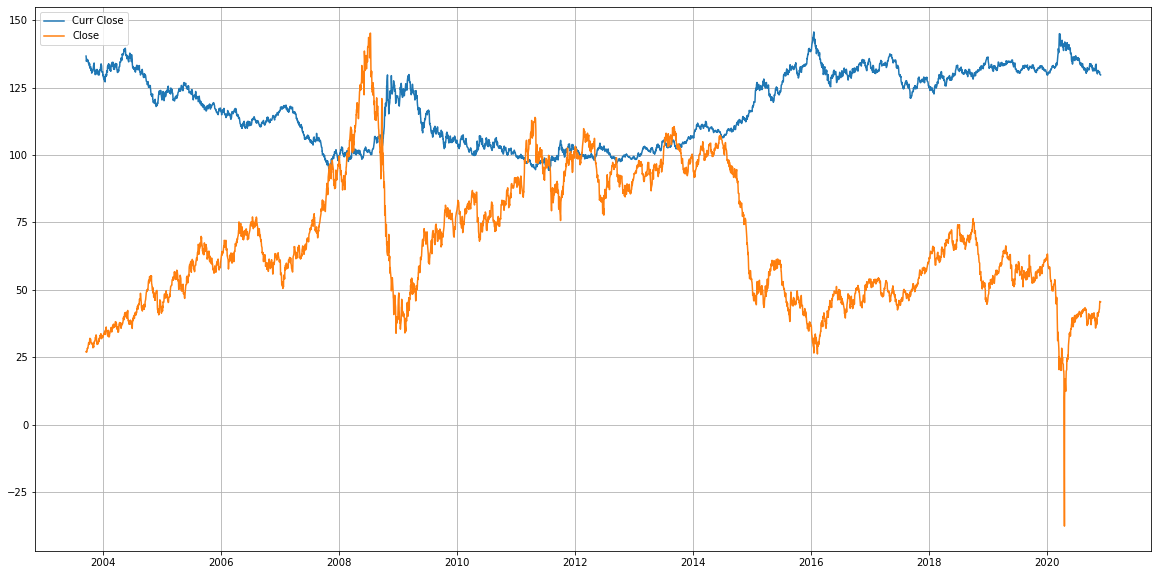

In [11]:
plotter(pair, 'Date', ['Curr Close', 'Close'])

In [12]:
def gen_z_score(lookback, df, on_column): 
    df["Mean"] = df[on_column].rolling(lookback).mean()
    df["Std"] = df[on_column].rolling(lookback).std()
    df[on_column + " Z Score"] = (df[on_column] - df["Mean"])/df["Std"]
    return(df)

In [13]:
pair['Diff'] = pair['Curr Close'] - pair['Close']
pair_z = gen_z_score(15, pair, 'Diff')

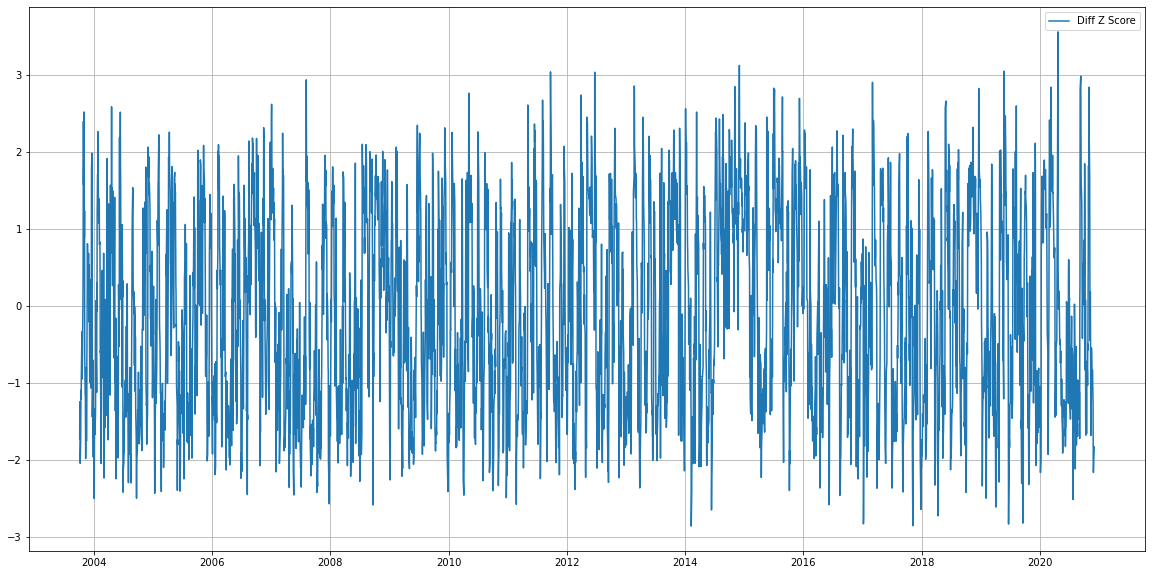

In [14]:
plotter(pair_z, 'Date', ['Diff Z Score'])

In [15]:
def backtester(backtest, entry, z_key, underlying_key):
    backtest["Position"] = 0
    mask = backtest[z_key] >= entry
    backtest.loc[mask, "Position"] = 1 
    mask2 = backtest[z_key] <= -entry
    backtest.loc[mask2, "Position"] = -1 
    backtest["Tick Change"] = -backtest[underlying_key].diff(-1)
    backtest["Tick PnL"] = backtest["Tick Change"] * backtest["Position"]
    backtest["Cum PnL"] = backtest["Tick PnL"].cumsum()
    return(backtest) 

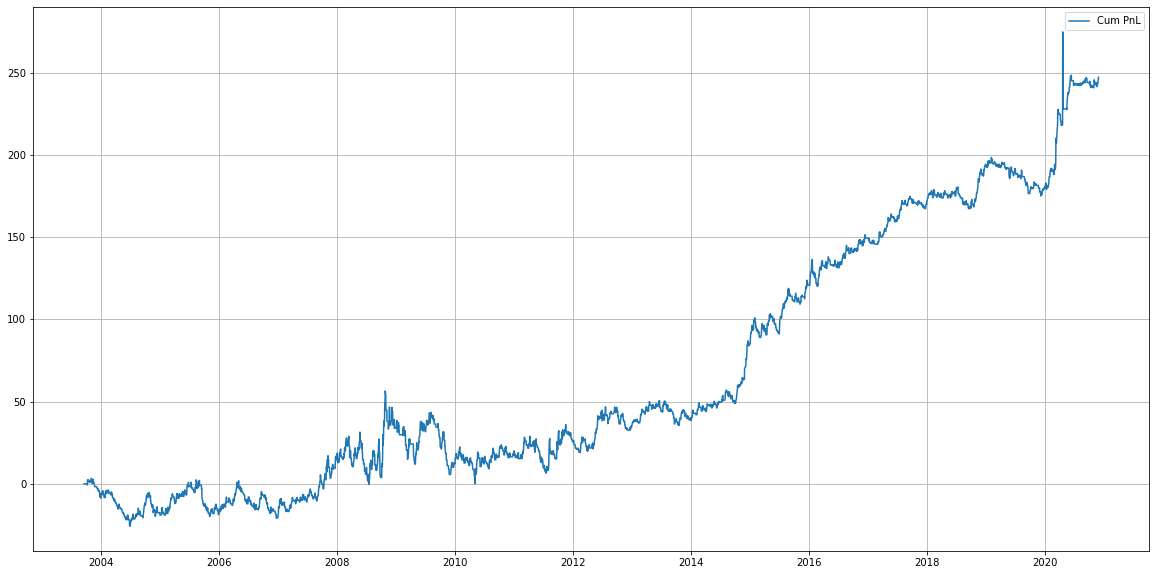

In [16]:
btest = backtester(pair_z, 0.8, 'Diff Z Score', 'Diff')
plotter(btest, 'Date', ['Cum PnL'])

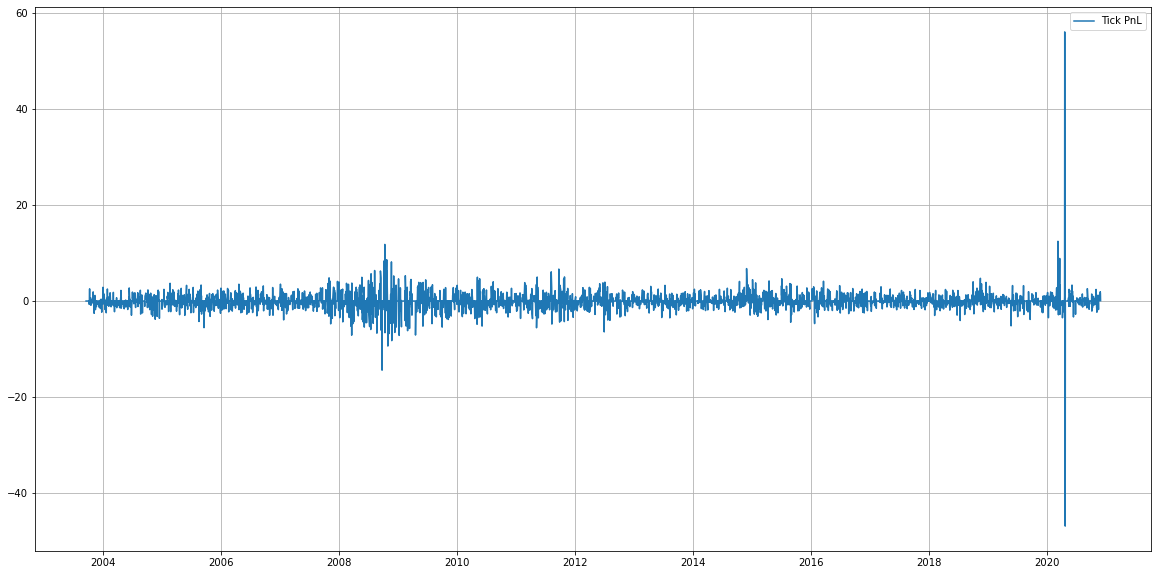

In [17]:
plotter(btest, 'Date',['Tick PnL'])

In [18]:
btest

,Date,Curr Close,Close,Diff,Mean,Std,Diff Z Score,Position,Tick Change,Tick PnL,Cum PnL
0,2003-09-17,136.67,27.03,109.64,NaN,NaN,NaN,0,-0.66,-0.00,-0.00
1,2003-09-18,136.15,27.17,108.98,NaN,NaN,NaN,0,-1.29,-0.00,-0.00
2,2003-09-19,134.72,27.03,107.69,NaN,NaN,NaN,0,0.77,0.00,0.00
3,2003-09-22,135.42,26.96,108.46,NaN,NaN,NaN,0,-0.08,-0.00,0.00
4,2003-09-23,135.51,27.13,108.38,NaN,NaN,NaN,0,-1.61,-0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
4276,2020-11-20,130.86,42.15,88.71,90.925333,2.484489,-0.891666,-1,-0.95,0.95,243.59
4277,2020-11-23,130.82,43.06,87.76,90.318000,1.992218,-1.283996,-1,-1.93,1.93,245.52
4278,2020-11-24,130.74,44.91,85.83,89.737333,1.942463,-2.011535,-1,-1.58,1.58,247.10
4279,2020-11-25,129.96,45.71,84.25,89.229333,2.307068,-2.158295,-1,-0.07,0.07,247.17


In [19]:
129.7-45.38

84.32

In [20]:
(84.32 - 88.676667)/2.462985

-1.7688564891787815